# Lorenz 1963 model

In [1]:
using PyPlot


Unable to init server: Could not connect: Connection refused
Unable to init server: Could not connect: Connection refused

(.:1829578): Gdk-CRITICAL **: 16:43:02.456: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed

(.:1829578): Gdk-CRITICAL **: 16:43:02.460: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed


In [4]:
function modgen_L63(;
    sig = 10,
    bet = 8/3,
    rho = 28,       
    steps = 10^4 +1,
    t_start = 0,
    t_stop = 100,
    discard = 10^4)

    steps_tot = steps + discard

    t = range(t_start, t_stop, length = steps)
    h = t[2] - t[1]
    x_init = randn(3)

    # Vector field
    F(x) = [sig*(x[2] - x[1]); 
        x[1]*(rho - x[3]) - x[2];  
        x[1]*x[2] - bet*x[3]]

    # Numerical solution (Euler Maruyama)
    X = zeros(3,steps_tot)
    X[:,1] = x_init
    for n = 1: steps_tot-1
        X[: , n+1] = X[:, n] .+ h*F(X[:,n]) .+ sqrt(h)*randn(3)
    end

    X = X[:,discard + 1 : steps_tot]
    X, t
end

modgen_L63 (generic function with 1 method)

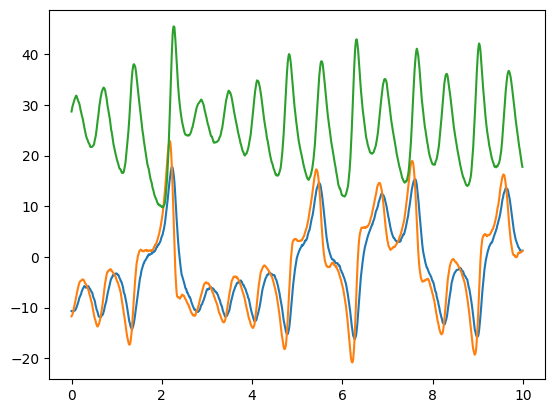

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f83dcb9c0d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f83dcb9c100>
 PyObject <matplotlib.lines.Line2D object at 0x7f83dcb9c280>

In [5]:
X, t = modgen_L63()

plot(t[1:1000],X[:, 1:1000]')